In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = './drive/MyDrive/Myself/ML Dataset/Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./DataSet')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.2,
                    fill_mode = 'nearest')
test_datagen

In [ ]:

base_dir = './DataSet/Dataset'

train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(70, 200),  # mengubah resolusi seluruh gambar menjadi 70x200 piksel
        batch_size=4,
        subset = 'training',
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(70, 200), # mengubah resolusi seluruh gambar menjadi 70x200 piksel
        subset = 'validation',
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 1380 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(70, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit 
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('./training/model-{epoch:03d}.model',monitor='accuracy',verbose=2,save_best_only=True,mode='auto')
model.summary()

model.fit(
      train_generator,
      steps_per_epoch=100,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=50,  # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks = [checkpoint])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 198, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 23, 128)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 21, 128)        1

Saving image 2.png to image 2.png
image 2.png
[[0.]]
forge


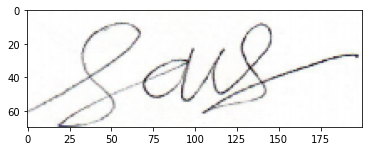

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

%matplotlib inline
 
uploaded = files.upload()
# Ganti Model dengan val_accuracy tertinggi
model = load_model('./training/model-085.model')


# # change it to your filename
# fn = '/content/Dataset_Signature_Final/Dataset/dataset1/real/00504005.png'
 
# # predicting images
# path = fn
# img = image.load_img(path, target_size=(70,200))
# imgplot = plt.imshow(img)
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
 
# images = np.vstack([x])
# classes = model.predict(images, batch_size=4)
# print(fn)
# print(classes)

# if classes==0:
#   print('real')
# else:
#   print('forge')
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(70,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)
  
  print(fn)
  print(classes)
  if classes==0:
    print('forge')
  else:
    print('real')